In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [169]:
df = pd.read_csv("./jw-combined-graph/live-birth.csv", thousands=",") #header=None, 
births_df = df.T
births_df.columns = births_df.iloc[0]
births_df = births_df[1:]
births_df["Quarter"] = births_df.index
births_df = births_df.iloc[::-1]
# no_of_rows = len(births_df.index)
# print(no_of_rows)
# only plot half of the data so i can see better
# births_df = births_df.iloc[0:int(no_of_rows)]
births_df.tail()

Data Series,Total Live-Births By Birth Order,Label,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over,Quarter
2020 2Q,9543,1,4499,3320,1186,359,101,78,2020 2Q
2020 3Q,9836,1,4762,3330,1174,381,116,73,2020 3Q
2020 4Q,9808,0,4722,3451,1133,323,117,62,2020 4Q
2021 1Q,8894,0,4097,3220,1093,326,98,60,2021 1Q
2021 2Q,9411,1,4298,3459,1140,339,112,63,2021 2Q


In [170]:
births_df[['year','quarter']] = births_df.Quarter.str.split(' ', expand=True)
births_df['quarter'] = births_df.quarter.str.replace('Q','')
births_df

Data Series,Total Live-Births By Birth Order,Label,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over,Quarter,year,quarter
1986 1Q,9954,0,4414,3553,1433,316,103,61,1986 1Q,1986,1
1986 2Q,9353,0,4186,3367,1271,332,87,50,1986 2Q,1986,2
1986 3Q,9854,1,4398,3475,1395,359,98,44,1986 3Q,1986,3
1986 4Q,10239,1,4782,3423,1454,351,98,51,1986 4Q,1986,4
1987 1Q,8834,0,4007,3053,1234,320,81,56,1987 1Q,1987,1
...,...,...,...,...,...,...,...,...,...,...,...
2020 2Q,9543,1,4499,3320,1186,359,101,78,2020 2Q,2020,2
2020 3Q,9836,1,4762,3330,1174,381,116,73,2020 3Q,2020,3
2020 4Q,9808,0,4722,3451,1133,323,117,62,2020 4Q,2020,4
2021 1Q,8894,0,4097,3220,1093,326,98,60,2021 1Q,2021,1


In [171]:
lc_across_industry = pd.read_csv("./unit-labour-cost-index-base-year-2015-100-quarterly/unit-labour-cost-index-base-year-2015-100-by-industry-quarterly.csv")
sector = lc_across_industry.columns[3]
sector_names = lc_across_industry[sector].unique()
lc_across_industry.tail()

,quarter,level_1,level_2,level_3,value
1733,2019-Q2,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Accommodation & Food Services,101.3
1734,2019-Q2,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Information & Communications,111.7
1735,2019-Q2,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Finance & Insurance,101.7
1736,2019-Q2,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Business Services,104.4
1737,2019-Q2,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Other Services Industries,98.2


In [172]:
lc_overall = pd.read_csv("./unit-labour-cost-index-base-year-2015-100-quarterly-sa/unit-labour-cost-index-base-year-2015-100-quarterly-sa.csv")
combined_lc = pd.concat([lc_across_industry, lc_overall])
combined_lc[sector].fillna(combined_lc[combined_lc.columns[1]], inplace=True)
sector_names = combined_lc[sector].unique()
df_lc = combined_lc.pivot_table(index="quarter", values= "value", columns = sector)
df_lc.reset_index(level=0, inplace=True)
df_lc

level_3,quarter,Unit Labour Cost Of Accommodation & Food Services,Unit Labour Cost Of Business Services,Unit Labour Cost Of Construction,Unit Labour Cost Of Finance & Insurance,Unit Labour Cost Of Information & Communications,Unit Labour Cost Of Manufacturing,Unit Labour Cost Of Other Goods Industries,Unit Labour Cost Of Other Services Industries,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Transportation & Storage,Unit Labour Cost Of Utilities,Unit Labour Cost Of Wholesale & Retail Trade
0,1980-Q1,19.3,27.7,55.0,44.3,98.8,88.4,33.8,39.4,54.2,62.4,71.9,73.9
1,1980-Q2,19.5,26.2,47.1,42.2,100.2,75.4,30.4,39.5,55.3,57.0,67.2,67.8
2,1980-Q3,20.2,27.8,51.5,42.9,105.6,78.4,31.7,41.5,56.1,57.7,71.9,67.8
3,1980-Q4,22.5,31.3,50.2,55.7,103.9,91.6,31.0,47.2,56.5,60.7,93.5,74.0
4,1981-Q1,25.1,32.5,64.8,40.5,110.6,95.3,36.6,42.6,58.6,63.1,72.7,87.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2018-Q4,104.7,109.9,112.7,105.0,107.3,93.1,136.3,110.1,101.9,113.1,111.8,115.8
156,2019-Q1,111.1,112.3,114.6,100.9,114.6,94.4,140.6,119.3,102.3,113.6,126.0,123.1
157,2019-Q2,101.3,104.4,106.7,101.7,111.7,79.9,128.3,98.2,103.3,106.0,95.6,110.6
158,2019-Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.1,NaN,NaN,NaN


In [173]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base import  datetools

df_lc[['year','quarter']] = df_lc.quarter.str.split('-', expand=True)
df_lc['quarter'] = df_lc.quarter.str.replace('Q','')
df_lc = df_lc.head(-2)
df_lc

level_3,quarter,Unit Labour Cost Of Accommodation & Food Services,Unit Labour Cost Of Business Services,Unit Labour Cost Of Construction,Unit Labour Cost Of Finance & Insurance,Unit Labour Cost Of Information & Communications,Unit Labour Cost Of Manufacturing,Unit Labour Cost Of Other Goods Industries,Unit Labour Cost Of Other Services Industries,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Transportation & Storage,Unit Labour Cost Of Utilities,Unit Labour Cost Of Wholesale & Retail Trade,year
0,1,19.3,27.7,55.0,44.3,98.8,88.4,33.8,39.4,54.2,62.4,71.9,73.9,1980
1,2,19.5,26.2,47.1,42.2,100.2,75.4,30.4,39.5,55.3,57.0,67.2,67.8,1980
2,3,20.2,27.8,51.5,42.9,105.6,78.4,31.7,41.5,56.1,57.7,71.9,67.8,1980
3,4,22.5,31.3,50.2,55.7,103.9,91.6,31.0,47.2,56.5,60.7,93.5,74.0,1980
4,1,25.1,32.5,64.8,40.5,110.6,95.3,36.6,42.6,58.6,63.1,72.7,87.3,1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,2,97.9,101.1,109.2,105.7,106.6,75.7,123.8,96.7,100.1,104.4,95.8,102.9,2018
154,3,93.6,99.8,108.7,100.9,101.5,73.4,119.3,105.6,100.5,101.2,100.3,101.8,2018
155,4,104.7,109.9,112.7,105.0,107.3,93.1,136.3,110.1,101.9,113.1,111.8,115.8,2018
156,1,111.1,112.3,114.6,100.9,114.6,94.4,140.6,119.3,102.3,113.6,126.0,123.1,2019


In [174]:
final_df = pd.merge(df_lc, births_df,  how='left', left_on=['year','quarter'], right_on = ['year','quarter'])
final_df

,quarter,Unit Labour Cost Of Accommodation & Food Services,Unit Labour Cost Of Business Services,Unit Labour Cost Of Construction,Unit Labour Cost Of Finance & Insurance,Unit Labour Cost Of Information & Communications,Unit Labour Cost Of Manufacturing,Unit Labour Cost Of Other Goods Industries,Unit Labour Cost Of Other Services Industries,Unit Labour Cost Of Overall Economy,...,year,Total Live-Births By Birth Order,Label,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over,Quarter
0,1,19.3,27.7,55.0,44.3,98.8,88.4,33.8,39.4,54.2,...,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,19.5,26.2,47.1,42.2,100.2,75.4,30.4,39.5,55.3,...,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,20.2,27.8,51.5,42.9,105.6,78.4,31.7,41.5,56.1,...,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,22.5,31.3,50.2,55.7,103.9,91.6,31.0,47.2,56.5,...,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,25.1,32.5,64.8,40.5,110.6,95.3,36.6,42.6,58.6,...,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,2,97.9,101.1,109.2,105.7,106.6,75.7,123.8,96.7,100.1,...,2018,9427,0,4387,3338,1168,374,94,66,2018 2Q
154,3,93.6,99.8,108.7,100.9,101.5,73.4,119.3,105.6,100.5,...,2018,9841,1,4574,3532,1224,337,116,58,2018 3Q
155,4,104.7,109.9,112.7,105.0,107.3,93.1,136.3,110.1,101.9,...,2018,10173,1,4711,3670,1232,372,109,79,2018 4Q
156,1,111.1,112.3,114.6,100.9,114.6,94.4,140.6,119.3,102.3,...,2019,9402,0,4456,3316,1128,316,105,81,2019 1Q


In [175]:
quarterly = final_df["year"] + "Q" + final_df["quarter"]
quarterly = datetools.dates_from_str(quarterly)
quarterly

[datetime.datetime(1980, 3, 31, 0, 0),
 datetime.datetime(1980, 6, 30, 0, 0),
 datetime.datetime(1980, 9, 30, 0, 0),
 datetime.datetime(1980, 12, 31, 0, 0),
 datetime.datetime(1981, 3, 31, 0, 0),
 datetime.datetime(1981, 6, 30, 0, 0),
 datetime.datetime(1981, 9, 30, 0, 0),
 datetime.datetime(1981, 12, 31, 0, 0),
 datetime.datetime(1982, 3, 31, 0, 0),
 datetime.datetime(1982, 6, 30, 0, 0),
 datetime.datetime(1982, 9, 30, 0, 0),
 datetime.datetime(1982, 12, 31, 0, 0),
 datetime.datetime(1983, 3, 31, 0, 0),
 datetime.datetime(1983, 6, 30, 0, 0),
 datetime.datetime(1983, 9, 30, 0, 0),
 datetime.datetime(1983, 12, 31, 0, 0),
 datetime.datetime(1984, 3, 31, 0, 0),
 datetime.datetime(1984, 6, 30, 0, 0),
 datetime.datetime(1984, 9, 30, 0, 0),
 datetime.datetime(1984, 12, 31, 0, 0),
 datetime.datetime(1985, 3, 31, 0, 0),
 datetime.datetime(1985, 6, 30, 0, 0),
 datetime.datetime(1985, 9, 30, 0, 0),
 datetime.datetime(1985, 12, 31, 0, 0),
 datetime.datetime(1986, 3, 31, 0, 0),
 datetime.datetime(

<AxesSubplot:>

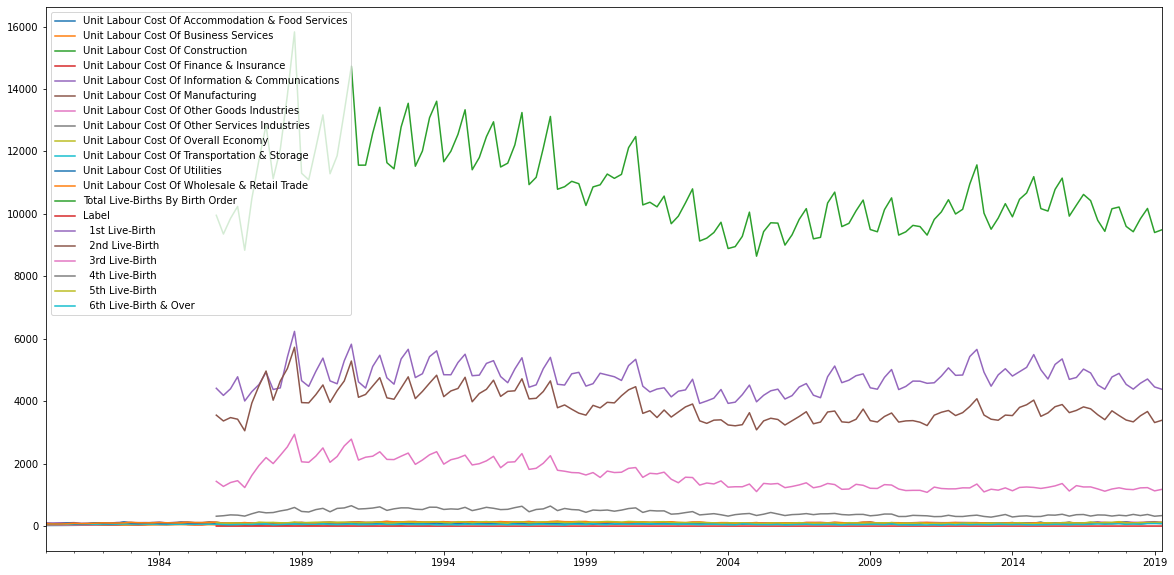

In [176]:
final_df.index = pd.DatetimeIndex(quarterly)
final_df.plot(figsize=(20,10))

In [177]:
final_df= final_df.drop('year',1)
final_df = final_df.drop('quarter',1)
final_df = final_df.drop('Quarter',1)
final_df = final_df.drop('Label',1)
final_df

/var/folders/n3/k22jjdlj0mjg38pn4qw5jc1c0000gn/T/ipykernel_66708/2435710541.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  final_df= final_df.drop('year',1)
/var/folders/n3/k22jjdlj0mjg38pn4qw5jc1c0000gn/T/ipykernel_66708/2435710541.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  final_df = final_df.drop('quarter',1)
/var/folders/n3/k22jjdlj0mjg38pn4qw5jc1c0000gn/T/ipykernel_66708/2435710541.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  final_df = final_df.drop('Quarter',1)
/var/folders/n3/k22jjdlj0mjg38pn4qw5jc1c0000gn/T/ipykernel_66708/2435710541.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  final_df = final_df.drop('Labe

,Unit Labour Cost Of Accommodation & Food Services,Unit Labour Cost Of Business Services,Unit Labour Cost Of Construction,Unit Labour Cost Of Finance & Insurance,Unit Labour Cost Of Information & Communications,Unit Labour Cost Of Manufacturing,Unit Labour Cost Of Other Goods Industries,Unit Labour Cost Of Other Services Industries,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Transportation & Storage,Unit Labour Cost Of Utilities,Unit Labour Cost Of Wholesale & Retail Trade,Total Live-Births By Birth Order,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over
1980-03-31,19.3,27.7,55.0,44.3,98.8,88.4,33.8,39.4,54.2,62.4,71.9,73.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-06-30,19.5,26.2,47.1,42.2,100.2,75.4,30.4,39.5,55.3,57.0,67.2,67.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-09-30,20.2,27.8,51.5,42.9,105.6,78.4,31.7,41.5,56.1,57.7,71.9,67.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-31,22.5,31.3,50.2,55.7,103.9,91.6,31.0,47.2,56.5,60.7,93.5,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-03-31,25.1,32.5,64.8,40.5,110.6,95.3,36.6,42.6,58.6,63.1,72.7,87.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-30,97.9,101.1,109.2,105.7,106.6,75.7,123.8,96.7,100.1,104.4,95.8,102.9,9427,4387,3338,1168,374,94,66
2018-09-30,93.6,99.8,108.7,100.9,101.5,73.4,119.3,105.6,100.5,101.2,100.3,101.8,9841,4574,3532,1224,337,116,58
2018-12-31,104.7,109.9,112.7,105.0,107.3,93.1,136.3,110.1,101.9,113.1,111.8,115.8,10173,4711,3670,1232,372,109,79
2019-03-31,111.1,112.3,114.6,100.9,114.6,94.4,140.6,119.3,102.3,113.6,126.0,123.1,9402,4456,3316,1128,316,105,81


In [180]:
num = 12 # test the final 12 time steps
df_train, df_test = final_df[0:-num], final_df[-num:]

In [181]:
#granger’s causality test
from statsmodels.tsa.stattools import grangercausalitytests
datatest = final_df.pct_change().dropna()
#Performing test on for labour uni and birth rate.
#gc_res = grangercausalitytests(datatest, 12)

In [182]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(datatest, variables = datatest.columns) 

,Unit Labour Cost Of Accommodation & Food Services_x,Unit Labour Cost Of Business Services_x,Unit Labour Cost Of Construction_x,Unit Labour Cost Of Finance & Insurance_x,Unit Labour Cost Of Information & Communications_x,Unit Labour Cost Of Manufacturing_x,Unit Labour Cost Of Other Goods Industries_x,Unit Labour Cost Of Other Services Industries_x,Unit Labour Cost Of Overall Economy_x,Unit Labour Cost Of Transportation & Storage_x,Unit Labour Cost Of Utilities_x,Unit Labour Cost Of Wholesale & Retail Trade_x,Total Live-Births By Birth Order_x,1st Live-Birth_x,2nd Live-Birth_x,3rd Live-Birth_x,4th Live-Birth_x,5th Live-Birth_x,6th Live-Birth & Over_x
Unit Labour Cost Of Accommodation & Food Services_y,1.0000,0.0000,0.0043,0.0149,0.0066,0.0000,0.0003,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0020,0.0116,0.0171,0.0592
Unit Labour Cost Of Business Services_y,0.0000,1.0000,0.0000,0.0000,0.0001,0.0000,0.0008,0.0000,0.0026,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,0.0407
Unit Labour Cost Of Construction_y,0.0000,0.0000,1.0000,0.0001,0.0000,0.0000,0.0002,0.0000,0.0799,0.0000,0.0000,0.0000,0.0000,0.0000,0.0002,0.0003,0.0180,0.1580,0.1605
Unit Labour Cost Of Finance & Insurance_y,0.0023,0.0003,0.0000,1.0000,0.0049,0.0000,0.0004,0.0000,0.0002,0.0015,0.0005,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,0.1231
Unit Labour Cost Of Information & Communications_y,0.0031,0.0072,0.0008,0.0015,1.0000,0.0000,0.0247,0.0000,0.1890,0.0008,0.0000,0.0000,0.0000,0.0000,0.0007,0.0014,0.0002,0.0003,0.0005
Unit Labour Cost Of Manufacturing_y,0.0004,0.0000,0.0000,0.0376,0.0001,1.0000,0.0013,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0060,0.0321
Unit Labour Cost Of Other Goods Industries_y,0.0000,0.0001,0.0000,0.0269,0.0052,0.0000,1.0000,0.0004,0.4872,0.0001,0.0012,0.0000,0.0000,0.0000,0.0000,0.0001,0.0018,0.0032,0.1020
Unit Labour Cost Of Other Services Industries_y,0.0000,0.0000,0.0000,0.0014,0.0000,0.0000,0.0003,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0104
Unit Labour Cost Of Overall Economy_y,0.0316,0.0207,0.0776,0.1669,0.3703,0.0060,0.0061,0.0054,1.0000,0.0293,0.1916,0.1075,0.0000,0.0002,0.0000,0.0009,0.0174,0.2386,0.0718
Unit Labour Cost Of Transportation & Storage_y,0.0000,0.0007,0.0000,0.0276,0.0805,0.0000,0.0669,0.0002,0.0000,1.0000,0.0089,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0008,0.0008


In [183]:
#first adf test
df_train = df_train.diff().dropna()

In [184]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

In [185]:
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Unit Labour Cost Of Accommodation & Food Services" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.3108
 No. Lags Chosen       = 10
 Critical value 1%     = -3.491
 Critical value 5%     = -2.888
 Critical value 10%    = -2.581
 => P-Value = 0.0004. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Unit Labour Cost Of Business Services" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.5888
 No. Lags Chosen       = 3
 Critical value 1%     = -3.488
 Critical value 5%     = -2.887
 Critical value 10%    = -2.58
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Unit Labour Cost Of Construction" 
    --------------------

In [186]:
#second adf test
df_train = df_train.diff().dropna()

In [187]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Unit Labour Cost Of Accommodation & Food Services" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.3753
 No. Lags Chosen       = 8
 Critical value 1%     = -3.491
 Critical value 5%     = -2.888
 Critical value 10%    = -2.581
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Unit Labour Cost Of Business Services" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.8755
 No. Lags Chosen       = 6
 Critical value 1%     = -3.49
 Critical value 5%     = -2.887
 Critical value 10%    = -2.581
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Unit Labour Cost Of Construction" 
    ---------------------------

In [188]:
#all datasets are now stationary
df_train

,Unit Labour Cost Of Accommodation & Food Services,Unit Labour Cost Of Business Services,Unit Labour Cost Of Construction,Unit Labour Cost Of Finance & Insurance,Unit Labour Cost Of Information & Communications,Unit Labour Cost Of Manufacturing,Unit Labour Cost Of Other Goods Industries,Unit Labour Cost Of Other Services Industries,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Transportation & Storage,Unit Labour Cost Of Utilities,Unit Labour Cost Of Wholesale & Retail Trade,Total Live-Births By Birth Order,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over
1986-09-30,1.9,1.1,20.7,9.4,-0.1,28.9,8.2,3.0,4.1,8.2,12.0,27.1,1102,440,294,286,11,27,5
1986-12-31,3.5,-1.6,-5.7,14.5,6.2,16.1,6.3,11.0,-0.5,5.2,23.2,3.4,-116,172,-160,-65,-35,-11,13
1987-03-31,-2.2,-1.7,1.5,-32.2,-13.2,-14.6,-0.8,-23.2,0.7,-2.3,-42.4,12.9,-1790,-1159,-318,-279,-23,-17,-2
1987-06-30,-1.4,6.3,-15.6,12.3,3.9,-11.6,-7.8,14.5,2.1,-3.6,16.5,-38.0,3059,1074,1259,609,106,18,-10
1987-09-30,-2.3,-4.3,8.0,2.2,-4.8,12.5,-0.6,-2.4,-4.7,-4.0,0.3,19.1,-418,-73,-339,-72,-12,43,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-30,-14.3,-20.5,-26.0,5.2,-15.3,-27.7,3.6,-33.6,-2.6,-3.1,-52.6,-23.8,944,189,630,68,43,12,2
2015-09-30,4.2,12.6,17.1,-3.8,3.6,19.7,-4.3,27.8,0.8,5.3,37.0,17.6,773,764,89,10,-53,-42,5
2015-12-31,13.7,10.8,8.5,6.6,9.0,19.4,20.6,-4.1,0.9,19.3,-3.5,14.5,-332,-290,-130,29,35,36,-12
2016-03-31,-4.2,-5.1,0.8,-8.5,-1.2,-18.5,-13.9,11.3,0.4,-18.4,21.2,-2.6,-1580,-832,-328,-315,-88,-11,-6


In [189]:
#Perform Johanson's Cointegration Test and Report Summary

#data = final_df[["Unit Labour Cost Of Overall Economy", "Total Live-Births By Birth Order"]].pct_change().dropna()
#data = final_df[["Unit Labour Cost Of Accommodation & Food Services","Unit Labour Cost Of Business Services", "Unit Labour Cost Of Construction"]].pct_change().dropna()

data = final_df[["Unit Labour Cost Of Accommodation & Food Services","Unit Labour Cost Of Business Services", "Unit Labour Cost Of Construction","Unit Labour Cost Of Finance & Insurance","Unit Labour Cost Of Information & Communications","Unit Labour Cost Of Manufacturing","Unit Labour Cost Of Other Goods Industries","Unit Labour Cost Of Other Services Industries","Unit Labour Cost Of Overall Economy","Unit Labour Cost Of Transportation & Storage","Unit Labour Cost Of Utilities","Unit Labour Cost Of Wholesale & Retail Trade"]].pct_change().dropna()
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(data)
        

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Unit Labour Cost Of Accommodation & Food Services ::  476.69    > 311.1288  =>   True
Unit Labour Cost Of Business Services ::  377.61    > 263.2603  =>   True
Unit Labour Cost Of Construction ::  293.91    > 219.4051  =>   True
Unit Labour Cost Of Finance & Insurance ::  236.28    > 179.5199  =>   True
Unit Labour Cost Of Information & Communications ::  187.31    > 143.6691  =>   True
Unit Labour Cost Of Manufacturing ::  140.74    > 111.7797  =>   True
Unit Labour Cost Of Other Goods Industries ::  100.59    > 83.9383   =>   True
Unit Labour Cost Of Other Services Industries ::  73.11     > 60.0627   =>   True
Unit Labour Cost Of Overall Economy ::  47.76     > 40.1749   =>   True
Unit Labour Cost Of Transportation & Storage ::  29.03     > 24.2761   =>   True
Unit Labour Cost Of Utilities ::  14.16     > 12.3212   =>   True
Unit Labour Cost Of Wholesale & Retail Trade ::  2.23      > 4.1296    

In [190]:
#data = final_df[["Unit Labour Cost Of Accommodation & Food Services","Unit Labour Cost Of Business Services", "Unit Labour Cost Of Construction","Unit Labour Cost Of Finance & Insurance","Unit Labour Cost Of Information & Communications","Unit Labour Cost Of Manufacturing","Unit Labour Cost Of Other Goods Industries","Unit Labour Cost Of Other Services Industries","Unit Labour Cost Of Overall Economy","Unit Labour Cost Of Transportation & Storage","Unit Labour Cost Of Utilities","Unit Labour Cost Of Wholesale & Retail Trade"]].pct_change().dropna()
data = df_train.pct_change().dropna()
data = data.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
var = VAR(data)


/Users/jun/.virtualenvs/data-sci/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  warnings.warn('No frequency information was'


In [191]:
np.isinf(data).any()

Unit Labour Cost Of Accommodation & Food Services    False
Unit Labour Cost Of Business Services                False
Unit Labour Cost Of Construction                     False
Unit Labour Cost Of Finance & Insurance              False
Unit Labour Cost Of Information & Communications     False
Unit Labour Cost Of Manufacturing                    False
Unit Labour Cost Of Other Goods Industries           False
Unit Labour Cost Of Other Services Industries        False
Unit Labour Cost Of Transportation & Storage         False
Unit Labour Cost Of Utilities                        False
Unit Labour Cost Of Wholesale & Retail Trade         False
Total Live-Births By Birth Order                     False
  1st Live-Birth                                     False
  2nd Live-Birth                                     False
  3rd Live-Birth                                     False
  4th Live-Birth                                     False
dtype: bool

In [192]:
for i in [1,2,3,4,5,6,7,8,9]:
    result = var.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  192.33414440893014
BIC :  198.72080727210522
FPE :  3.4969123186235604e+83
HQIC:  194.92731782442266 

Lag Order = 2
AIC :  192.42477265745694
BIC :  204.8899678503904
FPE :  4.766750507157371e+83
HQIC:  197.48548814686913 

Lag Order = 3
AIC :  194.06768596733912
BIC :  212.67815760378213
FPE :  4.727244377429067e+84
HQIC:  201.62247436751255 

Lag Order = 4
AIC :  190.10929739900467
BIC :  214.93303142942017
FPE :  4.066243849180864e+83
HQIC:  200.18512719487939 

Lag Order = 5
AIC :  189.48073582961788
BIC :  220.58699187452373
FPE :  5.7581593503704815e+84
HQIC:  202.105021781603 

Lag Order = 6
AIC :  180.73585404633553
BIC :  218.19519824670326
FPE :  2.834826176244988e+84
HQIC:  195.93646595430525 

Lag Order = 7
AIC :  153.11599395120965
BIC :  197.00033287354475
FPE :  1.2907555328431725e+90
HQIC:  170.9212655510957 

Lag Order = 8
AIC :  130.34427069605493
BIC :  180.72688633126808
FPE :  2.8559963325184503e+58
HQIC:  150.78300868411472 

Lag Order = 9
AI

In [194]:
print(len(data.columns))
print(len(final_df.columns))
print(data.columns)
print(final_df.columns)


16
19
Index(['Unit Labour Cost Of Accommodation & Food Services',
       'Unit Labour Cost Of Business Services',
       'Unit Labour Cost Of Construction',
       'Unit Labour Cost Of Finance & Insurance',
       'Unit Labour Cost Of Information & Communications',
       'Unit Labour Cost Of Manufacturing',
       'Unit Labour Cost Of Other Goods Industries',
       'Unit Labour Cost Of Other Services Industries',
       'Unit Labour Cost Of Transportation & Storage',
       'Unit Labour Cost Of Utilities',
       'Unit Labour Cost Of Wholesale & Retail Trade',
       'Total Live-Births By Birth Order', '  1st Live-Birth',
       '  2nd Live-Birth', '  3rd Live-Birth', '  4th Live-Birth'],
      dtype='object')
Index(['Unit Labour Cost Of Accommodation & Food Services',
       'Unit Labour Cost Of Business Services',
       'Unit Labour Cost Of Construction',
       'Unit Labour Cost Of Finance & Insurance',
       'Unit Labour Cost Of Information & Communications',
       'Unit Labou

In [196]:
new_df_train = df_train.drop('  5th Live-Birth', 1)
new_df_train = new_df_train.drop('  6th Live-Birth & Over', 1)
new_df_train = new_df_train.drop('Unit Labour Cost Of Overall Economy', 1)

print(len(new_df_train.columns))
print(len(data.columns))

16
16


/var/folders/n3/k22jjdlj0mjg38pn4qw5jc1c0000gn/T/ipykernel_66708/3492989558.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_df_train = df_train.drop('  5th Live-Birth', 1)
/var/folders/n3/k22jjdlj0mjg38pn4qw5jc1c0000gn/T/ipykernel_66708/3492989558.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_df_train = new_df_train.drop('  6th Live-Birth & Over', 1)
/var/folders/n3/k22jjdlj0mjg38pn4qw5jc1c0000gn/T/ipykernel_66708/3492989558.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_df_train = new_df_train.drop('Unit Labour Cost Of Overall Economy', 1)


In [197]:
new_df_test = df_test.drop('  5th Live-Birth', 1)
new_df_test = new_df_test.drop('  6th Live-Birth & Over', 1)
new_df_test = new_df_test.drop('Unit Labour Cost Of Overall Economy', 1)

new_final_df = final_df.drop('  5th Live-Birth', 1)
new_final_df = new_final_df.drop('  6th Live-Birth & Over', 1)
new_final_df = new_final_df.drop('Unit Labour Cost Of Overall Economy', 1)

/var/folders/n3/k22jjdlj0mjg38pn4qw5jc1c0000gn/T/ipykernel_66708/2727175368.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_df_test = df_test.drop('  5th Live-Birth', 1)
/var/folders/n3/k22jjdlj0mjg38pn4qw5jc1c0000gn/T/ipykernel_66708/2727175368.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_df_test = new_df_test.drop('  6th Live-Birth & Over', 1)
/var/folders/n3/k22jjdlj0mjg38pn4qw5jc1c0000gn/T/ipykernel_66708/2727175368.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_df_test = new_df_test.drop('Unit Labour Cost Of Overall Economy', 1)
/var/folders/n3/k22jjdlj0mjg38pn4qw5jc1c0000gn/T/ipykernel_66708/2727175368.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for t

In [207]:
x= var.select_order(maxlags=6)
x.summary()

,AIC,BIC,FPE,HQIC
0,189.6,190.0*,2.231e+82*,189.8*
1,192.4,198.9,3.656e+83,195.0
2,192.4,205.1,4.693e+83,197.6
3,194.0,212.9,4.641e+84,201.6
4,189.8,214.9,3.481e+83,200.0
5,189.3,220.6,5.817e+84,202.0
6,180.7*,218.2,2.835e+84,195.9


In [208]:
results = var.fit(6)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 30, Nov, 2021
Time:                     03:29:04
--------------------------------------------------------------------
No. of Equations:         16.0000    BIC:                    218.195
Nobs:                     113.000    HQIC:                   195.936
Log likelihood:          -11225.0    FPE:                2.83483e+84
AIC:                      180.736    Det(Omega_mle):     1.40047e+80
--------------------------------------------------------------------
Results for equation Unit Labour Cost Of Accommodation & Food Services
                                                          coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------------------------------------
const                                                        1.316741         4.376903            0.

In [209]:
lag_order = results.k_ar
forecast_input = new_df_train.values[-lag_order:]
forecast_input.shape

(6, 16)

In [210]:
#forecast values
num = 6
fc = results.forecast(y=forecast_input, steps=num)
df_forecast = pd.DataFrame(fc, index=final_df.index[-num:], columns=new_final_df.columns + '_forecast')
df_forecast 

,Unit Labour Cost Of Accommodation & Food Services_forecast,Unit Labour Cost Of Business Services_forecast,Unit Labour Cost Of Construction_forecast,Unit Labour Cost Of Finance & Insurance_forecast,Unit Labour Cost Of Information & Communications_forecast,Unit Labour Cost Of Manufacturing_forecast,Unit Labour Cost Of Other Goods Industries_forecast,Unit Labour Cost Of Other Services Industries_forecast,Unit Labour Cost Of Transportation & Storage_forecast,Unit Labour Cost Of Utilities_forecast,Unit Labour Cost Of Wholesale & Retail Trade_forecast,Total Live-Births By Birth Order_forecast,1st Live-Birth_forecast,2nd Live-Birth_forecast,3rd Live-Birth_forecast,4th Live-Birth_forecast
2018-03-31,-57.643243,127.293834,-57.058577,76.038161,1.018242e+16,132.775362,269.221063,-105.845545,215.889865,1013.246276,1.426690e+16,414.923269,-207.354023,-261.157937,3.030153,811.853503
2018-06-30,-153.821937,-0.772456,129.533124,259.667171,-3.549039e+15,-149.700383,62.159746,341.658780,-518.977635,-1335.670834,-4.546243e+15,-448.542238,1862.400322,-2659.694116,-435.232043,-198.940615
2018-09-30,-637.480896,-97.186516,187.633044,-337.783864,-1.213574e+16,167.807526,-277.596310,208.389312,595.555629,-52.008511,7.350584e+15,-916.114756,-38.955433,-195.536234,204.997139,-220.189112
2018-12-31,-196.118282,22.722995,237.010542,367.449945,5.873024e+15,-142.620675,-64.031802,-243.882067,150.586473,286.279947,-9.398805e+15,632.019727,2597.649124,1254.009920,-98.872358,-321.084170
2019-03-31,579.361034,80.309258,153.577806,-265.199164,-4.679824e+15,-46.089881,23.124511,261.133700,-492.006387,497.623157,-8.007634e+15,105.146593,-458.248312,983.936233,-261.248353,174.529204
2019-06-30,293.638263,-136.951928,893.796288,-72.929820,-1.098846e+15,-37.012494,256.695220,-225.847440,53.020982,174.917812,4.234467e+15,7.642581,-869.637420,1179.470895,598.971996,-211.045890


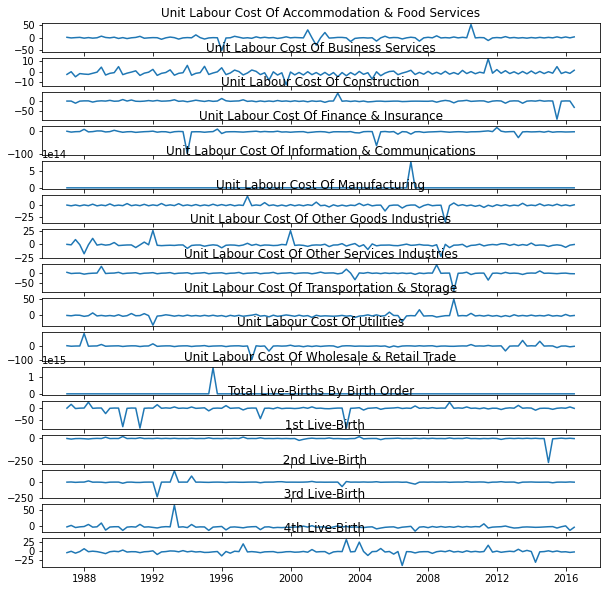

In [211]:
results.plot();

In [ ]:
results.plot_acorr()

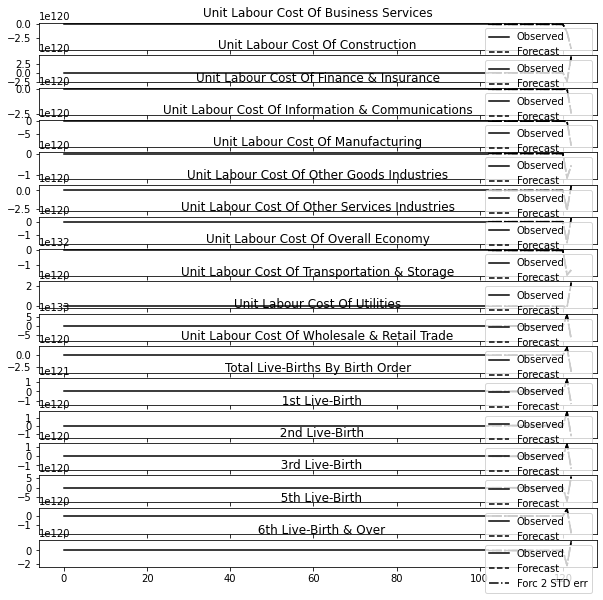

In [163]:
plt = results.plot_forecast(20)


In [89]:
fevd = results.fevd(5)

fevd.summary()

FEVD for Unit Labour Cost Of Accommodation & Food Services
     Unit Labour Cost Of Accommodation & Food Services  Unit Labour Cost Of Business Services  Unit Labour Cost Of Construction  Unit Labour Cost Of Finance & Insurance  Unit Labour Cost Of Information & Communications  Unit Labour Cost Of Manufacturing  Unit Labour Cost Of Other Goods Industries  Unit Labour Cost Of Other Services Industries  Unit Labour Cost Of Transportation & Storage  Unit Labour Cost Of Utilities  Unit Labour Cost Of Wholesale & Retail Trade  Total Live-Births By Birth Order    1st Live-Birth    2nd Live-Birth    3rd Live-Birth    4th Live-Birth
0                                             1.000000                               0.000000                          0.000000                                 0.000000                                          0.000000                           0.000000                                    0.000000                                       0.000000                       

In [ ]:
results.fevd(20).plot()

In [212]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_forecast'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

df_results = invert_transformation(new_df_train, df_forecast, second_diff=True) 

In [213]:
df_results

,Unit Labour Cost Of Accommodation & Food Services_forecast,Unit Labour Cost Of Business Services_forecast,Unit Labour Cost Of Construction_forecast,Unit Labour Cost Of Finance & Insurance_forecast,Unit Labour Cost Of Information & Communications_forecast,Unit Labour Cost Of Manufacturing_forecast,Unit Labour Cost Of Other Goods Industries_forecast,Unit Labour Cost Of Other Services Industries_forecast,Unit Labour Cost Of Transportation & Storage_forecast,Unit Labour Cost Of Utilities_forecast,...,Unit Labour Cost Of Other Goods Industries_1d,Unit Labour Cost Of Other Services Industries_1d,Unit Labour Cost Of Transportation & Storage_1d,Unit Labour Cost Of Utilities_1d,Unit Labour Cost Of Wholesale & Retail Trade_1d,Total Live-Births By Birth Order_1d,1st Live-Birth_1d,2nd Live-Birth_1d,3rd Live-Birth_1d,4th Live-Birth_1d
2018-03-31,-83.443243,107.593834,-106.258577,95.938161,1.018242e+16,110.675362,268.521063,-190.145545,216.489865,892.646276,...,275.821063,-153.645545,225.389865,942.346276,1.426690e+16,3563.923269,1340.645977,396.842063,731.030153,1003.853503
2018-06-30,-305.708423,226.815212,-58.784030,445.843494,1.681581e+16,91.950340,606.501872,-2.132310,-77.097905,499.321719,...,337.980809,188.013235,-293.587770,-393.324558,9.720655e+15,3115.381030,3203.046299,-2262.852053,295.798110,804.912889
2018-09-30,-1165.454499,248.850073,176.323561,457.964962,1.131345e+16,241.032845,666.886371,394.270238,224.869955,53.988650,...,60.384499,396.402548,301.967859,-445.333069,1.707124e+16,2199.266275,3164.090866,-2458.388287,500.795249,584.723777
2018-12-31,-2221.318857,293.607929,648.441694,837.536376,1.168412e+16,247.494674,663.239069,546.790719,677.424287,-105.064472,...,-3.647302,152.520481,452.554332,-159.053122,7.672434e+15,2831.286002,5761.739990,-1204.378367,401.922891,263.639607
2019-03-31,-2697.822181,418.675044,1274.137633,951.908625,7.374967e+15,207.866621,682.716277,960.444900,637.972232,233.505562,...,19.477209,413.654181,-39.452055,338.570035,-3.352001e+14,2936.432595,5303.491677,-220.442134,140.674538,438.168811
2019-06-30,-2880.687241,406.790230,2793.629859,993.351055,1.966967e+15,131.226075,958.888705,1148.251642,651.541160,746.993409,...,276.172428,187.806742,13.568928,513.487847,3.899266e+15,2944.075176,4433.854258,959.028760,739.646534,227.122921


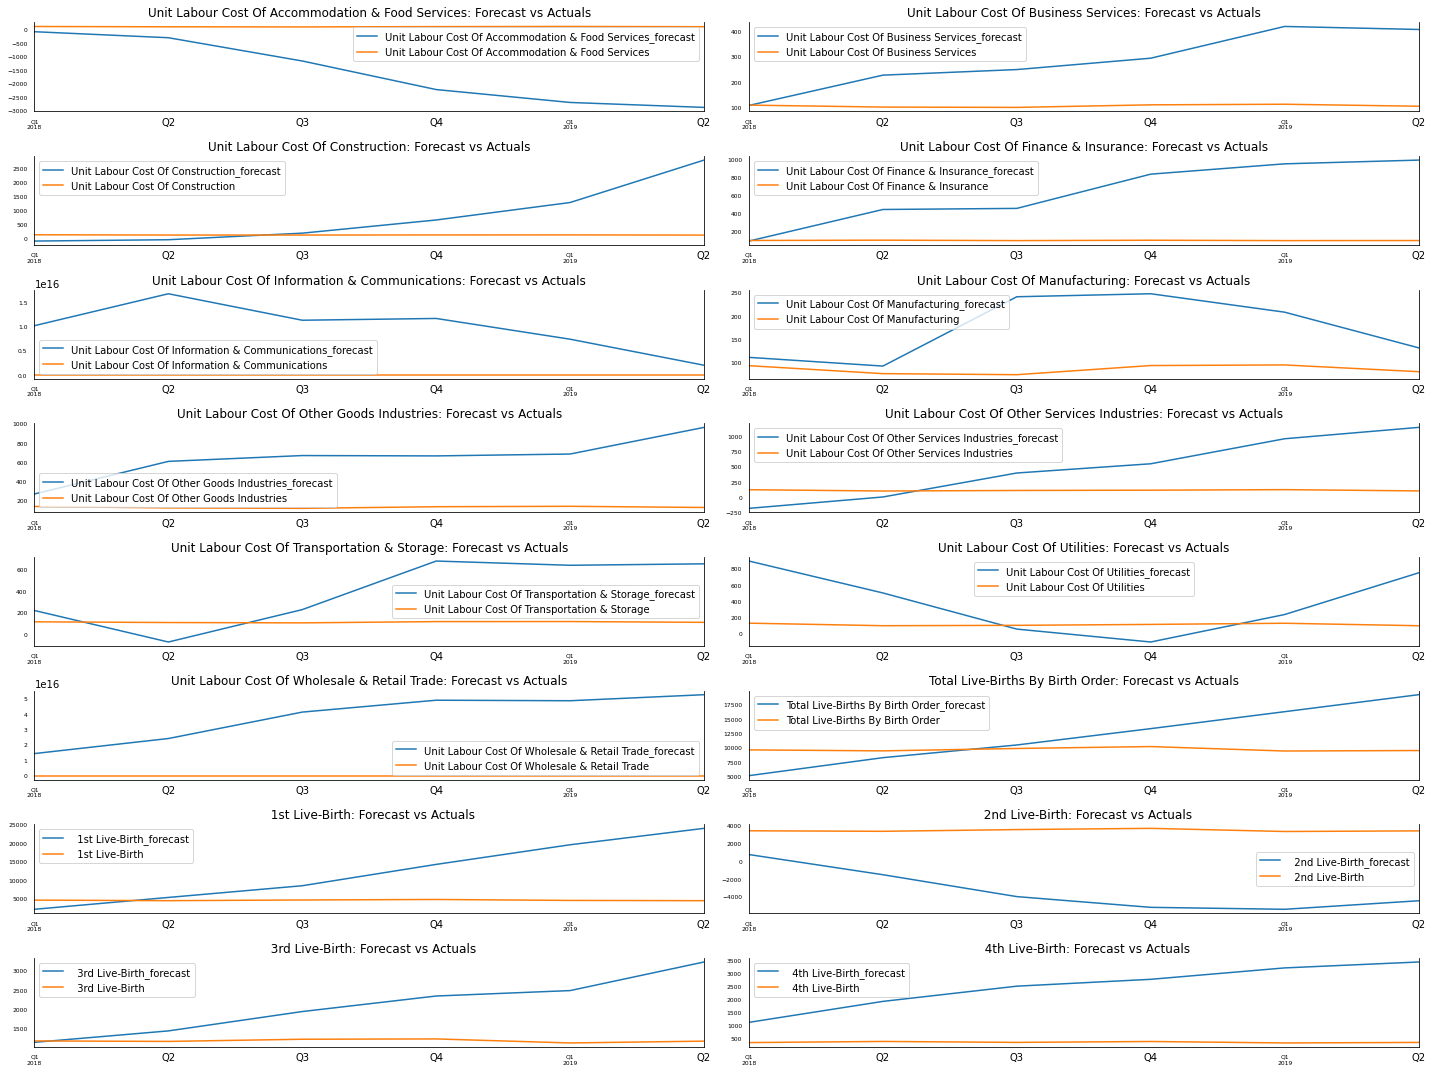

In [214]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=int(len(new_final_df.columns)/2), ncols=2, figsize=(20,15))
for i, (col,ax) in enumerate(zip(new_final_df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    new_df_test[col][-num:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();
